## ディープラーニングのモデルを作ってみよう！～二値分類モデル

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tensorflow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

/Users/MisayoMacBookPro/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


二値分類モデル用として、Lesson7で用いたIrisデータセットを使用します。

In [2]:
# scikit-learnからIrisのデータセットの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

Lesson7と同様、DataFrameにしておきます。

In [4]:
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<データの前処理>
二値分類問題として、Lesson7と同様にsetosaか、それ以外かを予測します。そのため、「is_setosa」列を追加します。

In [5]:
# setosaか、それ以外か
is_setosa = (dataset['species'] == 0).astype(np.int64)

# datasetに追加
dataset['is_setosa'] = is_setosa
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


目的変数は is_setosa、説明変数には petal_width, petal_length を使用します。今回のデータは単位がcmで値の範囲も概ね揃っているため、正規化は行ないません。

In [6]:
# 目的変数（Y)：is_setosa、説明変数（X)：petal_widthとpetal_length
Y = np.array(dataset['is_setosa'])
X = np.array(dataset[['petal_width', 'petal_length']])

In [7]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (150,) , X= (150, 2)


データの用意ができたら分割を行ないます。

In [8]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [9]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (73,) , X_train= (73, 2)
Y_valid= (32,) , X_valid= (32, 2)
Y_test= (45,) , X_test= (45, 2)


<モデルの構築>

二値分類モデルでも基本的な考え方は同じです。回帰モデルからの変更点は以下となります。これらのパラメータは二値分類モデルで標準的に利用されるものです。

- 入力層の「shape」の値をデータの形（列数: 説明変数Xはpetal_widthとpetal_lengthの二つ）に合わせて「2」に変更します
- 出力層の活性化関数に「sigmoid」を指定します。二値分類モデルの出力はどちらに分類されるかの確率です。よって0から1の間の値を取るsigmoid関数を指定します
- 目的関数に「binary_crossentropy」を指定します。metrics（学習時の性能を評価する関数）には正解率「accuracy」を指定します

In [10]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(8, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

モデルの構築が終わったら、構造を確認しましょう。

In [11]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

<学習の実施>
モデルの構築が終わったら学習を行ないます。 callbacks に tf.keras.callbacks.EarlyStopping を指定して過学習になる直前のエポック数で学習を停止させています。

In [12]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2603 - loss: 0.8554 - val_accuracy: 0.4688 - val_loss: 0.7706
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2603 - loss: 0.8262 - val_accuracy: 0.4688 - val_loss: 0.7612
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 0.8104 - val_accuracy: 0.4688 - val_loss: 0.7529
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 0.7949 - val_accuracy: 0.4688 - val_loss: 0.7447
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 0.7788 - val_accuracy: 0.4688 - val_loss: 0.7361
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 0.7628 - val_accuracy: 0.4688 - val_loss: 0.7275
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 0.7495 - val_accuracy: 0.5000 - val_loss: 0.7204
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2603 - loss: 0.7376 - val_accuracy: 0.5625 - v

metricsに「accuracy」を指定したので、学習中の性能はacc（正解率）で出力されます。今回は2799回が最適なエポック数であるようです（実行結果は環境によって異なります）。グラフで確認してみましょう。

Text(0, 0.5, 'crossentropy')

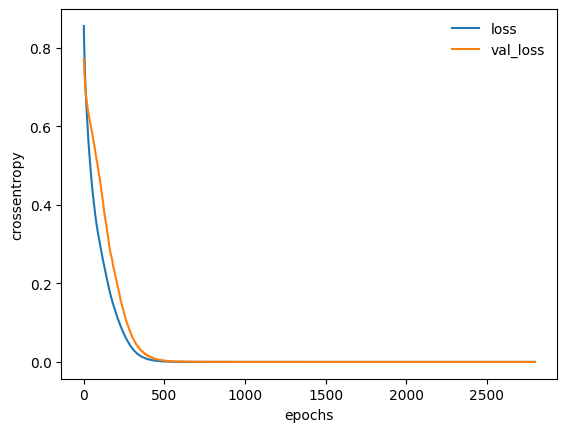

In [13]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

<テストデータによる評価>
最後にテストデータによる汎化性能を評価します。予測には、predict() を使用します。

In [14]:
# predictで予測を行なう
Y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


ひとまず、Y_pred を表示してみましょう。

In [15]:
# Y_predを表示
Y_pred

array([[6.0378906e-21],
       [9.6175836e-07],
       [9.9999839e-01],
       [5.8061875e-19],
       [9.9999863e-01],
       [3.2418829e-24],
       [9.9999541e-01],
       [4.6111433e-13],
       [3.1410809e-12],
       [8.8112045e-10],
       [1.1529121e-13],
       [1.0534879e-12],
       [5.0331495e-10],
       [6.9697991e-13],
       [4.7477374e-12],
       [9.9999934e-01],
       [1.0534879e-12],
       [1.7380907e-09],
       [9.9999607e-01],
       [9.9998730e-01],
       [1.7825744e-18],
       [1.0534879e-12],
       [9.9999857e-01],
       [9.9999839e-01],
       [2.8169735e-16],
       [9.9999690e-01],
       [9.9985099e-01],
       [2.5515609e-10],
       [1.7335164e-05],
       [9.9995685e-01],
       [1.5716897e-17],
       [1.0534879e-12],
       [9.9999863e-01],
       [1.8651969e-16],
       [9.5050524e-22],
       [1.2935027e-10],
       [9.9999368e-01],
       [8.5800922e-15],
       [3.6379823e-12],
       [9.0721475e-09],
       [1.4684256e-20],
       [9.999980

上記のように、分類モデルの出力は「確率」です。ちょうど0や1になっていないものがほとんどです。今のままではわかりづらいので、出力値を調整します。predict() の予測結果（Y_pred）に対して (Y_pred > 0.5).astype("int32") という処理を行なって「予測結果の確率が0.5より大きければ1、0.5以下なら0」にする計算を行ないます。

In [17]:
# 二値分類は予測結果の確率が0.5以下なら0,
# それより大きければ1となる計算で求める
Y_pred_cls = (Y_pred > 0.5).astype("int32")
Y_pred_cls

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

得られた結果は2次元の行列です。正解（目的変数）と比較するため、1次元にreshapeします。

In [18]:
# 形状を正解（目的変数）に合わせる
Y_pred_ = Y_pred_cls.reshape(-1)

最後にLesson7でも使用した classification_report でモデルの評価を行ないます。

In [19]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



今回はかなり上手くいきましたが、モデルの層やパラメータを変えるとどうなるか、いろいろと試してみましょう

## ディープラーニングのモデルを作ってみよう！～多クラス分類モデル

3つ目は多クラス分類モデルです。ノートブックは引き続き AI_10_ディープラーニング_02.ipynb、データセットもIris（dataset に格納されたデータ）を使用します。

<データの前処理>
予測するのは品種（species）です。Kerasで多クラス分類モデルを構築する場合、目的変数をカテゴリー変数に展開するのが一般的です（展開せずにそのまま使用する方法は後述します）。

In [21]:
# データの前処理
# 目的変数をカテゴリー変数に展開する
dataset2 = pd.get_dummies(data=dataset, columns=['species'])
dataset2.head()

,sepal_length,sepal_width,petal_length,petal_width,is_setosa,species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,1,True,False,False
1,4.9,3.0,1.4,0.2,1,True,False,False
2,4.7,3.2,1.3,0.2,1,True,False,False
3,4.6,3.1,1.5,0.2,1,True,False,False
4,5.0,3.6,1.4,0.2,1,True,False,False


目的変数と説明変数に分けます。

In [22]:
# Y:目的変数、X:説明変数
Y = np.array(dataset2[['species_0', 'species_1', 'species_2']])
X = np.array(dataset2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

データの分割を行ないます。

In [23]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

<モデルの構築>
多クラス分類モデルの標準的なパラメータの指定は以下のとおりです。また入力層の「input_shape」の値をデータの形に合わせて変更し、中間層の値も16に増やしています。

- 出力層の活性化関数に「softmax」を指定します。複数のクラスの確率を表現できるようsoftmax関数を指定します
- 目的関数に「categorical_crossentropy」を指定します。metricsには二値分類モデルと同様「accuracy」を指定します

In [24]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルの構築。整数のベクトル値の予測の場合、lossを「categorical_crossentropy」とする
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# モデルの構造を表示
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

<学習の実施>
モデルの構築が終わったら学習を行ないます。

In [26]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2603 - loss: 2.3208 - val_accuracy: 0.4688 - val_loss: 1.5183
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2603 - loss: 1.8892 - val_accuracy: 0.4688 - val_loss: 1.3782
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.6697 - val_accuracy: 0.4688 - val_loss: 1.2647
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2603 - loss: 1.4946 - val_accuracy: 0.4688 - val_loss: 1.1971
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.3767 - val_accuracy: 0.4688 - val_loss: 1.1495
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.2880 - val_accuracy: 0.4688 - val_loss: 1.1164
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.2186 - val_accuracy: 0.4688 - val_loss: 1.0903
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2740 - loss: 1.1534 - val_accuracy: 0.4375 - v

グラフで学習過程を確認してみましょう。

Text(0, 0.5, 'crossentropy')

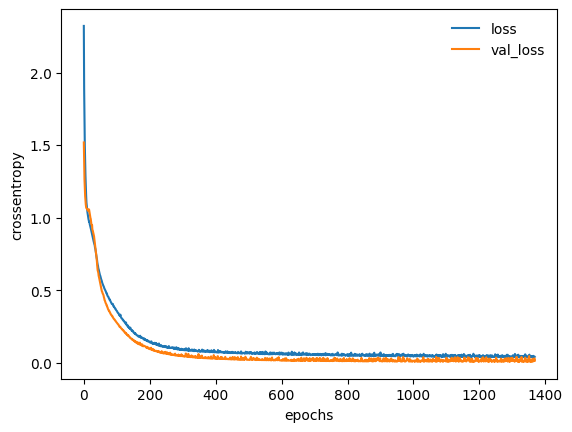

In [27]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

<テストデータによる評価>
最後にテストデータによる汎化性能を評価します。

In [29]:
# predictで予測を行なう
Y_pred_0 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


多クラス分類モデルの場合、predictの結果は、以下のようなリストになっています。左から順に'species_0', 'species_1', 'species_2'の「確率」です。

In [30]:
# predictの結果
Y_pred_0

array([[6.3202080e-21, 1.3978201e-05, 9.9998605e-01],
       [8.7616641e-08, 9.9989200e-01, 1.0789079e-04],
       [9.9999309e-01, 6.9360926e-06, 2.8269815e-20],
       [6.7697367e-22, 9.3789000e-05, 9.9990624e-01],
       [9.9996334e-01, 3.6703048e-05, 7.0750958e-18],
       [3.1534614e-25, 3.2213967e-07, 9.9999964e-01],
       [9.9997252e-01, 2.7595104e-05, 3.4081940e-18],
       [1.6021556e-09, 9.9971503e-01, 2.8496425e-04],
       [2.8782174e-10, 9.9892634e-01, 1.0736060e-03],
       [4.9375319e-07, 9.9999011e-01, 9.4689476e-06],
       [2.6476066e-18, 7.6064776e-04, 9.9923927e-01],
       [1.1540277e-08, 9.9988115e-01, 1.1888827e-04],
       [8.1021173e-10, 9.9596822e-01, 4.0317425e-03],
       [5.6157140e-10, 9.9817371e-01, 1.8263063e-03],
       [2.7948779e-10, 9.8578125e-01, 1.4218729e-02],
       [9.9997276e-01, 2.7286054e-05, 3.3941566e-18],
       [8.5077934e-10, 9.9232423e-01, 7.6757544e-03],
       [1.5862416e-09, 9.8028952e-01, 1.9710429e-02],
       [9.9993002e-01, 7.000

この結果に対してnp.argmaxの計算を行ないます。これは、リスト内で一番大きい要素の番号を出してくれます。

たとえば、以下のリストをnp.argmaxで計算すると、以下のような結果が得られます。

[9.3602688e-23, 1.2090289e-04, 9.9987912e-01]→計算結果は2
[3.7677286e-10, 9.9998891e-01, 1.1117504e-05]→計算結果は1
[1.0000000e+00, 7.2609637e-13, 2.3870655e-28]→計算結果は0
では、argmaxで上記の計算を行なってみましょう。

In [31]:
# 多クラス分類は予測結果の各リストにおける
# 最大値のインデックスを取得するようにする
Y_pred = np.argmax(Y_pred_0, axis=1)

np.argmaxで計算された結果を見てみましょう。この結果は、分類されたクラスの番号になります。

In [32]:
# Y_predを表示
Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

比較のため、カテゴリー変数に展開した Y_test の目的変数をクラス番号に復元します。書き方は先ほどと同じです。argmaxはリストで一番大きい値のインデックスを返します。「axis=1」は列方向を表します。カテゴリー変数は該当の列にだけ「1」が設定され、他の列は「0」であるため、結果としてクラス番号を得ることができます。

In [33]:
# Y_testのカテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [34]:
Y_test_

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

モデルの評価を行ないます。

In [35]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<<分類予測を行なう際の書き方は、以下のようになることを覚えておきましょう。>>

- 二値分類モデルの場合：(model.predict(X_test) > 0.5).astype("int32")
- 他クラス分類モデルの場合：np.argmax(model.predict(X_test), axis=1)

## 多クラス分類モデルで目的変数をそのまま扱う場合

Kerasで多クラス分類モデルを構築する場合、目的変数をカテゴリー変数に展開するのが一般的ですが、目的変数をそのまま扱うことも可能です。

In [36]:
# Y:目的変数、X:説明変数
# 目的変数はそのまま使う（整数のベクトル値を予測することになる）
Y = np.array(dataset['species'])
X = np.array(dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [37]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

目的変数をそのまま使う場合、目的関数に「sparse_categorical_crossentropy」を指定します。

In [39]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルの構築。整数のベクトル値の予測の場合、lossを「sparse_categorical_crossentropy」とする
model.compile(optimizer = "rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
# モデルの構造を表示
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2603 - loss: 1.7807 - val_accuracy: 0.4688 - val_loss: 1.1719
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.4599 - val_accuracy: 0.4688 - val_loss: 1.0373
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2603 - loss: 1.2748 - val_accuracy: 0.4688 - val_loss: 0.9555
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.1574 - val_accuracy: 0.4688 - val_loss: 0.8999
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2603 - loss: 1.0729 - val_accuracy: 0.4688 - val_loss: 0.8614
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2740 - loss: 1.0101 - val_accuracy: 0.5625 - val_loss: 0.8300
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4110 - loss: 0.9544 - val_accuracy: 0.6250 - val_loss: 0.8027
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5753 - loss: 0.9157 - val_accuracy: 0.7188 - v

グラフで学習過程を確認します。

Text(0, 0.5, 'crossentropy')

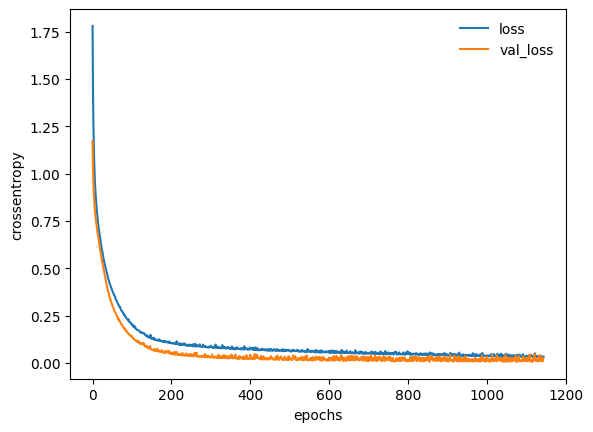

In [42]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

テストデータによる評価を行ないます。予測値はクラス番号となるため、そのまま目的変数と比較できます。

In [43]:
# predictで予測を行なう
Y_pred_0 = model.predict(X_test)

# 多クラス分類は予測結果の各リストにおける
# 最大値のインデックスを取得するようにする
Y_pred = np.argmax(Y_pred_0, axis=1)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x31af38fe0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [46]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

